In [65]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import cos, asin, sqrt, pi

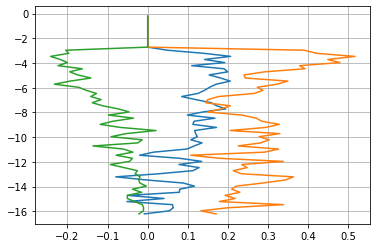

In [2]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = hf['East_vel']
north_vel = hf['North_vel']
vertical_vel = hf['Vertical_vel']
z = hf['z_vec']

fig, ax = plt.subplots()
ax.plot(east_vel[1,:], z, label='East velocity [m/sec]')
ax.plot(north_vel[1,:], z, label='North velocity [m/sec]')
ax.plot(vertical_vel[1,:], z, label='Vertical velocity [m/sec]')
#plt.legend()

plt.grid(True)
plt.show()

In [3]:
east_vel[0,:].shape

(65,)

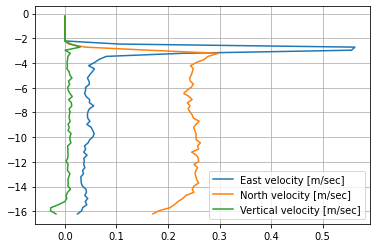

In [4]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 5*60 # sec
time_step = 2.5 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
time_start

0

In [25]:
def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [26]:
radar_lat = 32.07833
radar_long = 34.47233

In [27]:
adcp_lat = 32.08048
adcp_long = 34.46277

In [28]:
distance(radar_lat, radar_long, adcp_lat, adcp_long)

0.9319006597343568

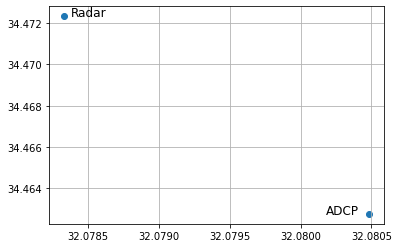

In [29]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat, adcp_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

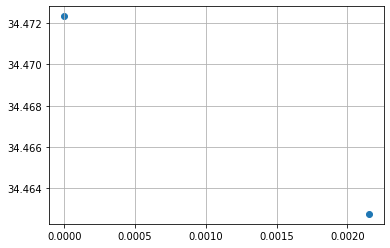

In [31]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat - radar_lat, adcp_lat-radar_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Put the radar point on (0,0)

In [36]:
radar_0_lat = radar_lat - radar_lat
adcp_0_lat = adcp_lat - radar_lat

In [37]:
radar_0_long = radar_long - radar_long 
adcp_0_long = adcp_long - radar_long

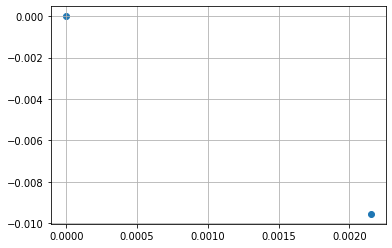

In [38]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_0_lat]), y=np.array([radar_0_long, adcp_0_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [39]:
# Convert to km 

In [40]:
x = np.array([radar_lat, adcp_lat])
y = np.array([radar_long, adcp_long])
x_dist = x[1]-x[0]
y_dist = y[0]-y[1]

In [41]:
theta = np.arctan2(y_dist,x_dist)

In [42]:
km_distance = distance(radar_lat, radar_long, adcp_lat, adcp_long)

In [43]:
opp = km_distance*np.sin(theta)
opp

0.9091917380933765

In [44]:
adj = km_distance*np.cos(theta)
adj

0.20447303733273597

In [45]:
km_distance

0.9319006597343568

In [48]:
adcp_lat_m = adj * 1000
adcp_long_m = opp * 1000

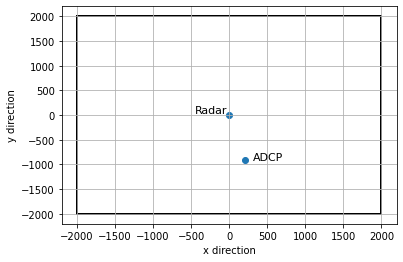

In [82]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_lat -55 , radar_long , 'Radar', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m , 'ADCP', fontsize=11, ha='right')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw = "2")
plt.gca().add_patch(square)

plt.xlabel("x direction")
plt.ylabel("y direction")
# Show the plot
plt.show()

In [18]:
# importing the libraries
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [19]:
points = 'C:\\Users\josep\Desktop\Long_Lats.csv'
data = pd.read_csv(points)

In [20]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 31.9, urcrnrlat = 32.15, llcrnrlon = 34.3, urcrnrlon = 34.7, resolution = 'h')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.fillcontinents(color='green', lake_color='blue')
#m.bluemarble()

# creating variable for latitude and longitude to list
lat = data['Latitude'].tolist()
lon = data['Longitude'].tolist()

# plotting the map
m.scatter(lon, lat, latlon = True, s = 1, c = 'red', marker = 'o', alpha = 1)

plt.show()

KeyboardInterrupt: 

<Figure size 864x648 with 0 Axes>